# COVID-19

* Corona Virus Disease 2019
* Caused by a **SARS-COV-2** corona virus.  
* First identified in **Wuhan, Hubei, China**.  
* Earliest reported symptoms occurred on **1 December 2019**. 
* First cases were linked to contact with the Huanan Seafood Wholesale Market, which sold live animals. 
* On 30 January the WHO declared the outbreak to be a Public Health Emergency of International Concern 

# Libraries

### Install

In [3]:
# install calmap
! pip install calmap

### Import

In [4]:
# essential libraries
import json
from urllib.request import urlopen

# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import calmap
import folium

# color pallette
c = '#393e46' # confirmed - grey
d = '#ff2e63' # death - red
r = '#30e3ca' # recovered - cyan
s = '#f8b400' # still infected - yellow

cdr = [c, d, r] 
idr = [s, d, r] 
rid = [r, s, d]

# Dataset

In [5]:
# list files
!ls ../input/corona-virus-report

covid_19_clean_complete.csv


In [6]:
# importing datasets
full_table = pd.read_csv('../input/corona-virus-report/covid_19_clean_complete.csv', 
                         parse_dates=['Date'])
full_table.head()

Province/State  Country/Region      Lat      Long       Date  Confirmed  \
0          Anhui  Mainland China  31.8257  117.2264 2020-01-22          1   
1        Beijing  Mainland China  40.1824  116.4142 2020-01-22         14   
2      Chongqing  Mainland China  30.0572  107.8740 2020-01-22          6   
3         Fujian  Mainland China  26.0789  117.9874 2020-01-22          1   
4          Gansu  Mainland China  36.0611  103.8343 2020-01-22          0   

   Deaths  Recovered  
0       0          0  
1       0          0  
2       0          0  
3       0          0  
4       0          0

In [7]:
# dataframe info
# full_table.info()

In [8]:
# checking for missing value
# full_table.isna().sum()

# Preprocessing

### Cleaning Data

In [9]:
# cases 
cases = ['Confirmed', 'Deaths', 'Recovered', 'Still Infected']

# still infected = confirmed - deaths - recovered
full_table['Still Infected'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

# replacing Mainland china with just China
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')

# filling missing values 
full_table[['Province/State']] = full_table[['Province/State']].fillna('')
full_table[cases] = full_table[cases].fillna(0)

### Derived Tables

In [10]:
# cases in the ships
ship = full_table[full_table['Province/State'].str.lower().str.contains('ship')]

# china and the row
china = full_table[full_table['Country/Region']=='China']
row = full_table[full_table['Country/Region']!='China']

# latest
full_latest = full_table[full_table['Date'] == max(full_table['Date'])].reset_index()
china_latest = full_latest[full_latest['Country/Region']=='China']
row_latest = full_latest[full_latest['Country/Region']!='China']

# latest condensed
full_latest_grouped = full_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Still Infected'].sum().reset_index()
china_latest_grouped = china_latest.groupby('Province/State')['Confirmed', 'Deaths', 'Recovered', 'Still Infected'].sum().reset_index()
row_latest_grouped = row_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Still Infected'].sum().reset_index()

# Latest Data

### Latest Complete Data

In [11]:
temp = full_table.groupby(['Country/Region', 'Province/State'])['Confirmed', 'Deaths', 'Recovered', 'Still Infected'].max()
temp.style.background_gradient(cmap='Reds')

### Latest Condensed Data

In [12]:
temp = full_table.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Still Infected'].sum().reset_index()
temp = temp[temp['Date']==max(temp['Date'])].reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1')

In [13]:
tm = temp.melt(id_vars="Date", value_vars=['Still Infected', 'Deaths', 'Recovered'])
fig = px.treemap(tm, path=["variable"], values="value", height=200, color_discrete_sequence=rid)
fig.show()

# Country wise Data

### In each country

In [14]:
temp_f = full_latest_grouped.sort_values(by='Confirmed', ascending=False)
temp_f = temp_f.reset_index(drop=True)
temp_f.style.background_gradient(cmap='Reds')

### Countries with deaths reported

In [15]:
temp_flg = temp_f[temp_f['Deaths']>0][['Country/Region', 'Deaths']]
temp_flg.sort_values('Deaths', ascending=False).style.background_gradient(cmap='Reds')

### Countries with no cases recovered

In [16]:
temp = temp_f[temp_f['Recovered']==0][['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
temp.reset_index(drop=True).style.background_gradient(cmap='Reds')

### Countries with all cases died

In [17]:
temp = row_latest_grouped[row_latest_grouped['Confirmed']==
                          row_latest_grouped['Deaths']]
temp = temp[['Country/Region', 'Confirmed', 'Deaths']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Reds')

### Countries with all the cases recovered

In [18]:
temp = row_latest_grouped[row_latest_grouped['Confirmed']==
                          row_latest_grouped['Recovered']]
temp = temp[['Country/Region', 'Confirmed', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Greens')

### Countries with no affected case anymore

In [19]:
temp = row_latest_grouped[row_latest_grouped['Confirmed']==
                          row_latest_grouped['Deaths']+
                          row_latest_grouped['Recovered']]
temp = temp[['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Greens')

# Chinese province wise data

### In each provinces

In [20]:
temp_f = china_latest_grouped[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
temp_f = temp_f.sort_values(by='Confirmed', ascending=False)
temp_f = temp_f.reset_index(drop=True)
temp_f.style.background_gradient(cmap='Pastel1_r')

### Provinces with no cases recovered

In [21]:
temp = china_latest_grouped[china_latest_grouped['Recovered']==0]
temp = temp[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1_r')

### Provinces with all cases died

In [22]:
temp = china_latest_grouped[china_latest_grouped['Confirmed']==
                          china_latest_grouped['Deaths']]
temp = temp[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Greens')

### Provinces with all the cases recovered

In [23]:
temp = china_latest_grouped[china_latest_grouped['Confirmed']==
                          china_latest_grouped['Recovered']]
temp = temp[['Province/State', 'Confirmed', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Greens')

### Provinces with no affected cases anymore

In [24]:
temp = china_latest_grouped[china_latest_grouped['Confirmed']==
                          china_latest_grouped['Deaths']+
                          china_latest_grouped['Recovered']]
temp = temp[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Greens')

# Maps

### Across the globe

In [25]:
# World wide

m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=1)

for i in range(0, len(full_latest)):
    folium.Circle(
        location=[full_latest.iloc[i]['Lat'], full_latest.iloc[i]['Long']],
        color='crimson', 
        tooltip =   '<li><bold>Country : '+str(full_latest.iloc[i]['Country/Region'])+
                    '<li><bold>Province : '+str(full_latest.iloc[i]['Province/State'])+
                    '<li><bold>Confirmed : '+str(full_latest.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(full_latest.iloc[i]['Deaths'])+
                    '<li><bold>Recovered : '+str(full_latest.iloc[i]['Recovered']),
        radius=int(full_latest.iloc[i]['Confirmed'])**1.1).add_to(m)
m

# Affected Countries

In [26]:
# Confirmed

fig = px.choropleth(full_latest_grouped, locations="Country/Region", 
                    locationmode='country names', color="Confirmed", 
                    hover_name="Country/Region", range_color=[1,7000], 
                    color_continuous_scale="aggrnyl", 
                    title='Countries with Confirmed Cases')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [27]:
# Deaths

fig = px.choropleth(full_latest_grouped[full_latest_grouped['Deaths']>0], 
                    locations="Country/Region", locationmode='country names',
                    color="Deaths", hover_name="Country/Region", 
                    range_color=[1,50], color_continuous_scale="agsunset",
                    title='Countries with Deaths Reported')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [28]:
# China

clg = china_latest_grouped.iloc[:, :].copy()

name = {'Inner Mongolia': 'Inner Mongol',
        'Tibet': 'Xizang'}
clg.loc[:, 'Province/State'] = clg.loc[: 'Province/State'].replace(name)

with urlopen('https://raw.githubusercontent.com/yg2619/Choropleth-Maps-in-Python-Using-Plotly/master/china_geojson.json') as file:
    china_json = json.load(file)

fig = go.Figure(go.Choroplethmapbox(geojson=china_json, locations=clg['Province/State'], 
                                    z=china_latest_grouped['Confirmed'], colorscale='Viridis', zmin=0, zmax=1000,
                                    marker_opacity=0.8, marker_line_width=0))
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=3, mapbox_center = {"lat": 35.8617, "lon": 104.1954})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(title='Confirmed Cases in Chinese Provincec')
fig.show()

In [29]:
# US

temp = full_latest.loc[full_latest['Country/Region']=='US', ['Province/State', 'Confirmed']]
temp['State'] = temp.loc[:, 'Province/State'].str.split(', ').str[-1]
temp = temp.groupby('State')['Confirmed'].sum().reset_index()

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

fig = go.Figure(go.Choropleth(locations=temp['State'], z = temp['Confirmed'].astype(float), 
                              locationmode = 'USA-states', colorscale = 'Viridis'))
fig.update_layout(geo_scope='usa', title='Confirmed Cases in US States')
fig.show()

# Spread over the time

In [30]:
formated_gdf = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     range_color= [0, max(formated_gdf['Confirmed'])+2], 
                     projection="natural earth", animation_frame="Date", 
                     title='Spread outside China over time')
fig.update(layout_coloraxis_showscale=False)
fig.show()

# No. cases in top 20 countries

In [31]:
fig = px.bar(full_latest_grouped[['Country/Region', 'Confirmed']].sort_values('Confirmed', ascending=False).head(20), 
             y="Confirmed", x="Country/Region",  log_y=True, title='Confirmed Cases', text='Confirmed')
fig.update_traces(marker_color=c, opacity=0.6, textposition='outside')
fig.show()

temp = full_latest_grouped[['Country/Region', 'Deaths']].sort_values('Deaths', ascending=False).head(20)
fig = px.bar(temp[temp['Deaths']>0], y="Deaths", x="Country/Region", title='Deaths', log_y=True, text='Deaths')
fig.update_traces(marker_color=d, opacity=0.7, textposition='outside')
fig.show()

# Cases over time

In [32]:
temp = full_table.groupby('Date')['Recovered', 'Deaths', 'Still Infected'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Still Infected'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.bar(temp, x="Date", y="Count", color='Case',
             title='Cases over time', color_discrete_sequence = [r, d, s])
fig.show()

# No. of cases each day

In [33]:
temp = full_table.groupby(['Country/Region', 'Date'])['Confirmed', 'Deaths', 'Recovered'].sum()
temp = temp.reset_index()
# temp.head()

fig = px.bar(temp, x="Date", y="Confirmed", color='Country/Region', orientation='v', height=600,
             title='Confirmed', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()

fig = px.bar(temp, x="Date", y="Deaths", color='Country/Region', orientation='v', height=600,
             title='Deaths', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()

# No. of new cases everyday

In [34]:
# In China
temp = china.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().diff()
temp = temp.reset_index()
temp = temp.melt(id_vars="Date", 
                 value_vars=['Confirmed', 'Deaths', 'Recovered'])

fig = px.bar(temp, x="Date", y="value", color='variable', 
             title='In China',
             color_discrete_sequence=cdr)
fig.update_layout(barmode='group')
fig.show()

#-----------------------------------------------------------------------------

# ROW
temp = row.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().diff()
temp = temp.reset_index()
temp = temp.melt(id_vars="Date", 
                 value_vars=['Confirmed', 'Deaths', 'Recovered'])

fig = px.bar(temp, x="Date", y="value", color='variable', 
             title='Outside China',
             color_discrete_sequence=cdr)
fig.update_layout(barmode='group')
fig.show()

In [35]:
def from_china_or_not(row):
    if row['Country/Region']=='China':
        return 'From China'
    else:
        return 'Outside China'
    
temp = full_table.copy()
temp['Region'] = temp.apply(from_china_or_not, axis=1)
temp = temp.groupby(['Region', 'Date'])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()
mask = temp['Region'] != temp['Region'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan

fig = px.bar(temp, x='Date', y='Confirmed', color='Region', barmode='group', 
             text='Confirmed', title='Confirmed', color_discrete_sequence= cdr)
fig.update_traces(textposition='outside')
fig.show()

fig = px.bar(temp, x='Date', y='Deaths', color='Region', barmode='group', 
             text='Confirmed', title='Deaths', color_discrete_sequence= cdr)
fig.update_traces(textposition='outside')
fig.update_traces(textangle=-90)
fig.show()

In [36]:
temp = full_table.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()

mask = temp['Country/Region'] != temp['Country/Region'].shift(1)

temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan

fig = px.bar(temp, x="Date", y="Confirmed", color='Country/Region',
             title='Number of new cases everyday')
fig.show()

fig = px.bar(temp[temp['Country/Region']!='China'], x="Date", y="Confirmed", color='Country/Region',
             title='Number of new cases outside China everyday')
fig.show()

fig = px.bar(temp, x="Date", y="Deaths", color='Country/Region',
             title='Number of new death case reported outside China everyday')
fig.show()

fig = px.bar(temp[temp['Country/Region']!='China'], x="Date", y="Deaths", color='Country/Region',
             title='Number of new death case reported outside China everyday')
fig.show()

# No. of places to which COVID-19 spread

In [37]:
c_spread = china[china['Confirmed']!=0].groupby('Date')['Province/State'].unique().apply(len)
c_spread = pd.DataFrame(c_spread).reset_index()

fig = px.line(c_spread, x='Date', y='Province/State', 
              title='Number of Provinces/States/Regions of China to which COVID-19 spread over the time',
             color_discrete_sequence=cdr)
fig.show()

# ------------------------------------------------------------------------------------------

spread = full_table[full_table['Confirmed']!=0].groupby('Date')['Country/Region'].unique().apply(len)
spread = pd.DataFrame(spread).reset_index()

fig = px.line(spread, x='Date', y='Country/Region', 
              title='Number of Countries/Regions to which COVID-19 spread over the time',
             color_discrete_sequence=cdr)
fig.show()

# Confirmed cases in each Countries

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



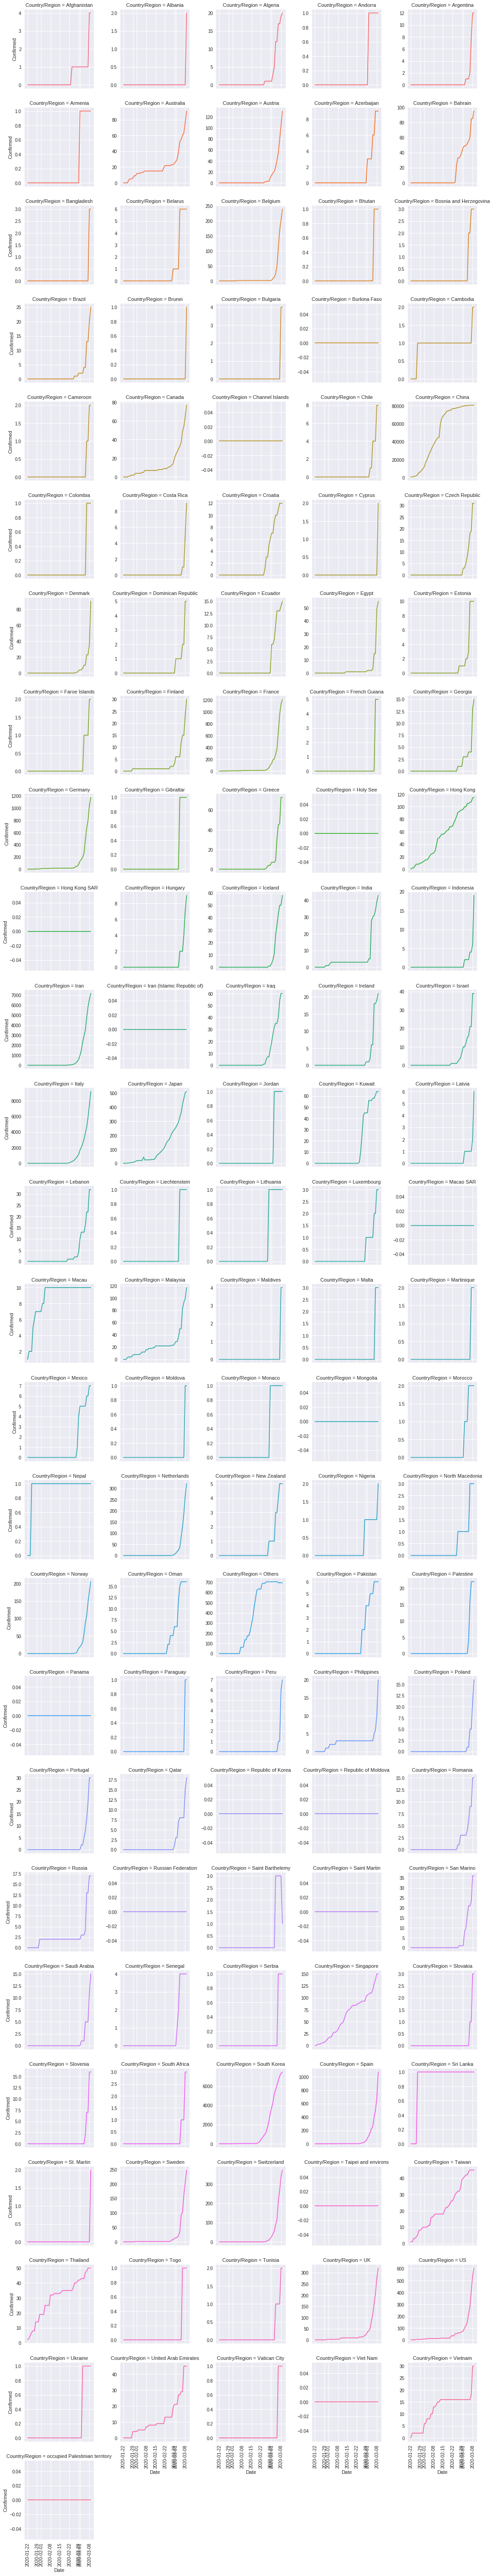

In [38]:
temp = full_table.groupby(['Date', 'Country/Region'])['Confirmed'].sum()
temp = temp.reset_index().sort_values(by=['Date', 'Country/Region'])

plt.style.use('seaborn')
g = sns.FacetGrid(temp, col="Country/Region", hue="Country/Region", 
                  sharey=False, col_wrap=5)
g = g.map(plt.plot, "Date", "Confirmed")
g.set_xticklabels(rotation=90)
plt.show()

# New cases in each Countries

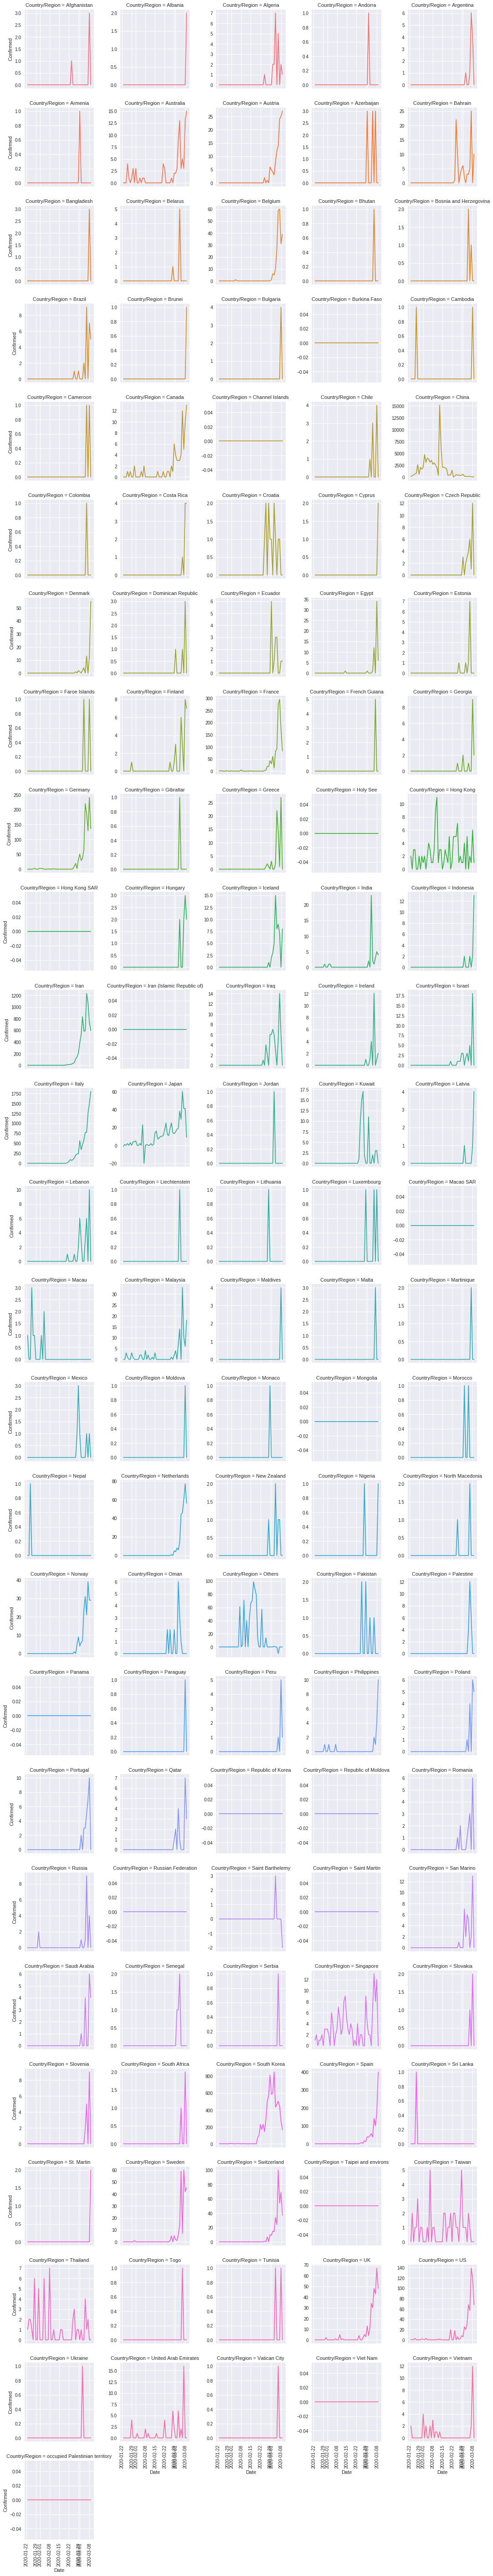

In [39]:
temp = full_table.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()

mask = temp['Country/Region'] != temp['Country/Region'].shift(1)

temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan

plt.style.use('seaborn')
g = sns.FacetGrid(temp, col="Country/Region", hue="Country/Region", 
                  sharey=False, col_wrap=5)
g = g.map(sns.lineplot, "Date", "Confirmed")
g.set_xticklabels(rotation=90)
plt.show()